In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

# Analyse exploratoire

In [2]:
data_bus = pd.read_csv("data_processed/data_w_meteo.csv",parse_dates=['dateTime'])
data_bus.shape

(36843, 5)

Méthode d'extraction des caractéristiques de la date.

In [3]:
def concat_month_year(x):
    return f"{x.month}/{x.year}"

def concat_month_week_year(x):
    return f"{x.month}/{x.week_number}/{x.year}"

Extraction des caractéristiques de la date.

In [4]:
data_bus["year"] = data_bus.dateTime.dt.year
data_bus["dateTimeStr"] = data_bus["dateTime"].astype(str)
data_bus["month"] = data_bus.dateTime.dt.month
data_bus["day"] = data_bus.dateTime.dt.day
data_bus["month_year"] = data_bus.apply(concat_month_year,axis=1)
data_bus["month_name"] = data_bus.dateTime.dt.month_name()
data_bus["is_weekend"] = data_bus.dateTime.dt.dayofweek > 4
data_bus["week_number"] = data_bus.dateTime.dt.isocalendar().week
data_bus["month_week_year"] = data_bus.apply(concat_month_week_year,axis=1)

Définition des identificateur des mois.

In [5]:
months_id = [1,2,3,4,5,6,7,8,9,10,11,12]
months = ['Janvier','Février','Mars','Avril','Main','Juin','Juillet','Aout','Septembre','Octobre','Novembre','Décembre']

Visualisation des 2 premières valeur de notre DataFrame.

In [6]:
data_bus.head(2)

,dateTime,passengersNumber,line,lineType,meteo_status,year,dateTimeStr,month,day,month_year,month_name,is_weekend,week_number,month_week_year
0,2019-04-05,418.0,42,daily,météo défavorable,2019,2019-04-05,4,5,4/2019,April,False,14,4/14/2019
1,2019-04-05,1000.0,16,daily,météo défavorable,2019,2019-04-05,4,5,4/2019,April,False,14,4/14/2019


## Visualisation des données

### Evolution de l'affluence dans le temps

<Axes: xlabel='dateTime', ylabel='passengersNumber'>

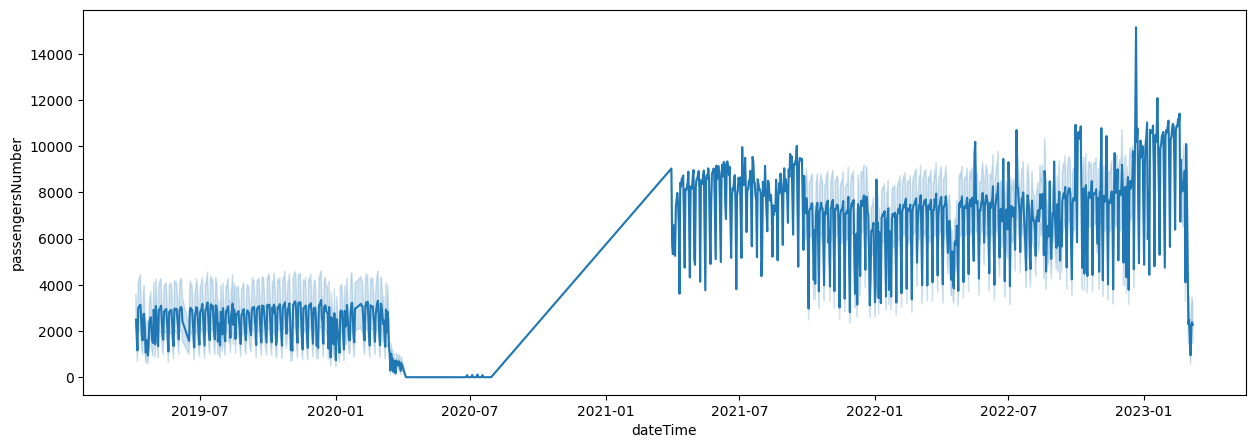

In [7]:
plt.figure(figsize=(15,5))
sns.lineplot(data_bus,x="dateTime",y="passengersNumber")

On remarque que l'évolution de l'affluence se présente comme une série temporelle.

### Affluence total par mois de chaque années

In [8]:
tmp2 = data_bus.groupby(["year","month","month_year"]).passengersNumber.agg("sum").reset_index()
tmp2.head(2)

,year,month,month_year,passengersNumber
0,2019,4,4/2019,1758114.0
1,2019,5,5/2019,2485487.0


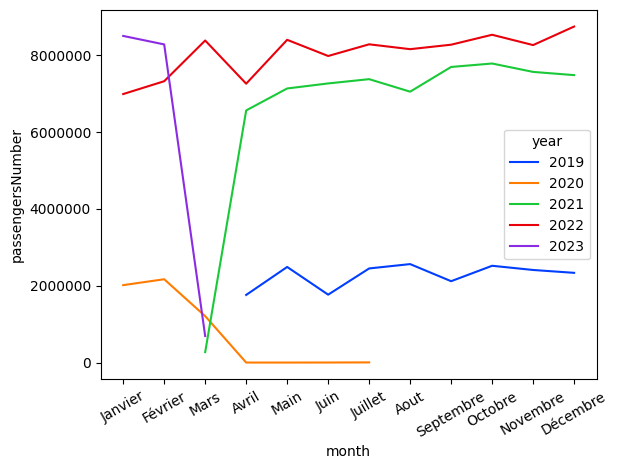

In [9]:
fig = sns.lineplot(data=tmp2,x="month",y="passengersNumber",hue="year",palette="bright")
fig.set_xticks(months_id)
fig.set_xticklabels(months)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=30)
plt.show()

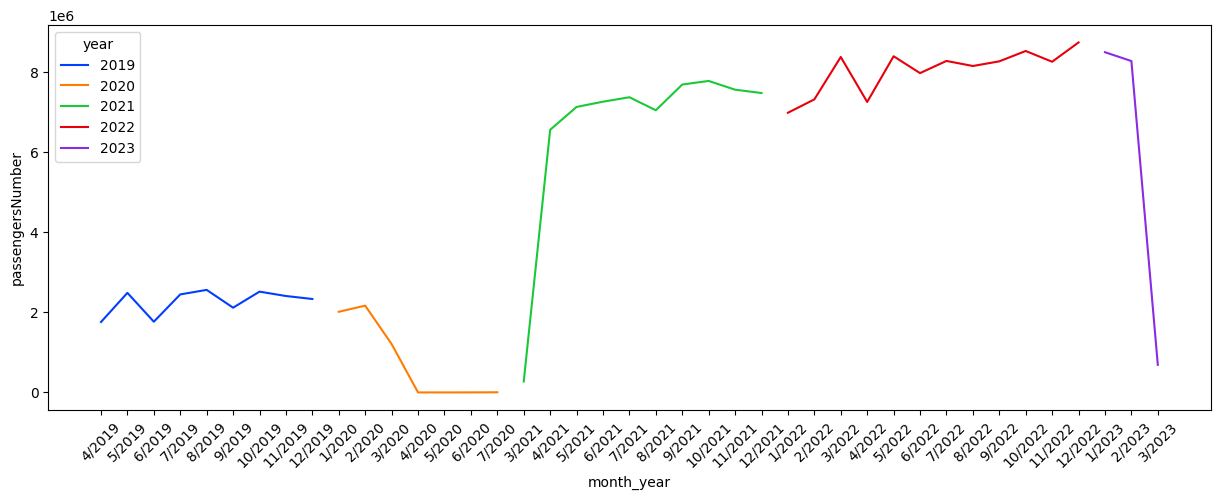

In [10]:
plt.figure(figsize=(15,5))
sns.lineplot(data=tmp2,x="month_year",y="passengersNumber",hue="year",palette="bright")
plt.xticks(rotation=45)
plt.show()

Les lineplots ci-dessus montre l'évolution de l'affluence par mois pour chaque années (de 2019 à 2023) :

- 2019 :
    - En avril l'aflluence est faible
    - En mai elle augmente
    - En juin elle diminue
    - En juillet elle augmente et stabilise jusqu'à aout avec une pique en aout.
    - Entre aout et septembre elle baisse mais est toujous supérieur à celle de juin
    - Enntre septembre et octobre elle remonte et baisse légèrement vers décembre

- 2020 :
    - L'affluence augmente entre janvier et février, puis baisse entre février et avril, pour finalement être à 0 à partir avril
    
- 2021 :
    - Entre avril 2020 et mars l'affluence était à 0 et à repris à partir de mars 2021
    - Entre mars et avril, l'affluence a beaucoup augmenté
    - Entre avril et mai elle a augmenté
    - Entre mai et juillet elle a continué d'augementer
    - Entre juillet et aout elle a baissé mais elle a été toujours supérieure à celle d'avril
    - Entre aout et septembre, elle a augmenté pour atteindre son pic
    - Entre septembre et octobre on a une légère augmentation
    - Entre novembre et décembre on observe une baisse
    
- 2022 :
    - croissance entre janvier et mars avec un forte croissante entre février et mars
    - baisse importante entre mars et avril
    - croissance entre avril et mai
    - légère baisse entre mai et juin
    - légère augmentation entre juin et juillet
    - légère baisse entre juillet et aout
    - légère augmentation entre aout et septembre
    - légère augmentation entre septembre et octobre
    - légère baisse entre octobre et novembre
    - croissance entre novembre et décembre

- 2023 :
    - baisse entre janvier et février

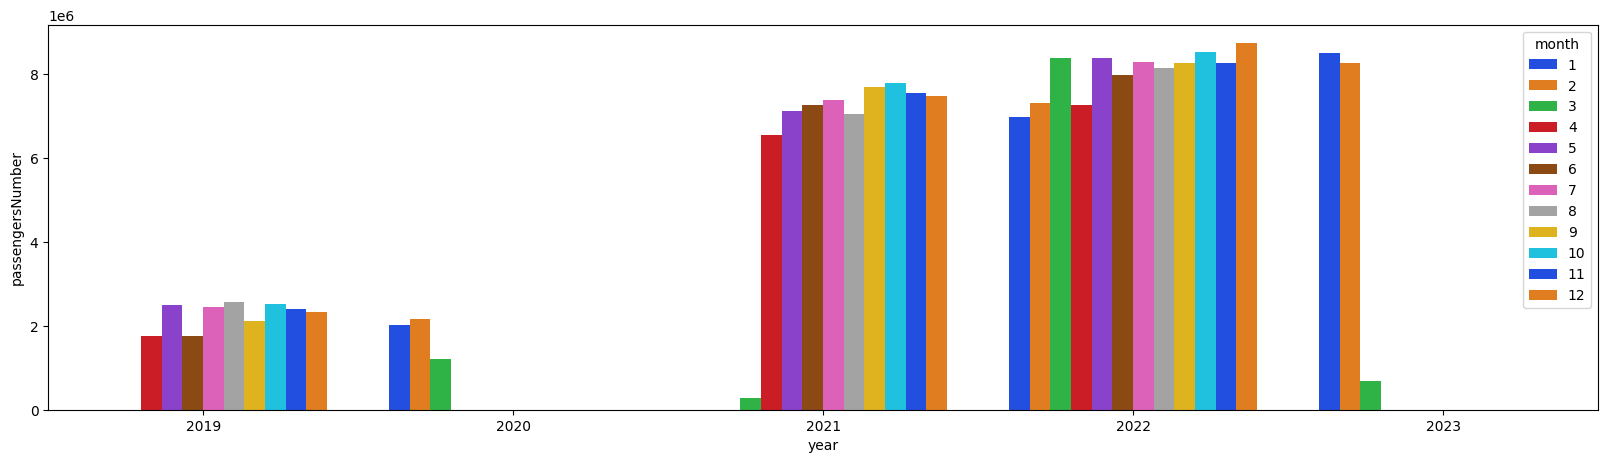

In [11]:
plt.figure(figsize=(20,5))
fig = sns.barplot(data=tmp2,x="year",y="passengersNumber",hue="month",palette="bright")
plt.show()

Le barplot ci-dessous montre l'affluence par mois pour chaque année. Il nous permet de comparer les affluences dans le temps.

**Globalement**

- En 2020 l'affluence est tombée à zéro certainement à cause du COVID
- Il y'a une baisse de l'affluence entre janvier et décembre pour toutes les années
- Entre janvier et février il y'a une augementation sauf en 2023 l'affluence baissé
- Il y'a toujours une augmentation entre avril et mai
- Il y'a baisse et augmentation et entre mai et juillet sauf en 2021 où elle a augmenté légèrement en continue dans la période
- Il y'a une baisse entre juillet et aout sauf en 2019 où elle a augmenté. D'ailleurs le mois précédent en 2019 était en croissance tout comme les mois même mois pour les autres années
- Il y'a une croissance entre aout et septembre sauf en 2019 où il y'a eu une baisse
- Il y'a une croissance et baisse entre septembre et novembre pour toutes les années
- Il y'a une baisse entre novembre et décembre sauf en 2022 où il y'a augmentation

**Pour chaque année**

- 2019: Les mois avec les plus grandes affluences sont aout et octobre, et ceux avec les plus faibles sont avril et juin (Notons qu'on commence à partir d'avril)
- 2020: Le mois avec la plus grande affluence est février celui avec la plus faible mars (Notion qu'il s'agit de la période de COVID)
- 2021: Les mois avec les plus grandes affluences sont septembre et octobre, et ceux avec les plus faibles sont avril et janvier
- 2022: Les mois avec les plus grandes affluences sont septembre et décembre, et ceux avec les plus faibles sont avril et janvier
- 2023: Le mois avec la plus grande affluence est janvier celui avec la plus faible mars (Notons que nos données d'arrêtent à mars 2023)

En somme, les mois avec les affluences les plus faibles sont janvier et avril tandis que ceux avec les affluences les évelées sont septembre et octobre. (On pourrais aussi dire décembre)

### Affluence total par semaine de chaque années

Aggrégation de l'affluence par semaine.

In [12]:
tmp3 = data_bus.groupby(["year","month","week_number","month_week_year"]).passengersNumber.agg("sum").reset_index()
tmp3.head(3)

,year,month,week_number,month_week_year,passengersNumber
0,2019,4,14,4/14/2019,199524.0
1,2019,4,15,4/15/2019,494170.0
2,2019,4,16,4/16/2019,429092.0


Les lineplots ci-dessous montre l'évolution de l'affluence par semaine de l'année. Elle nous permet de comprendre comment l'affluence évolue dans un mois. On observe les valeurs par trimestre de chaque année.

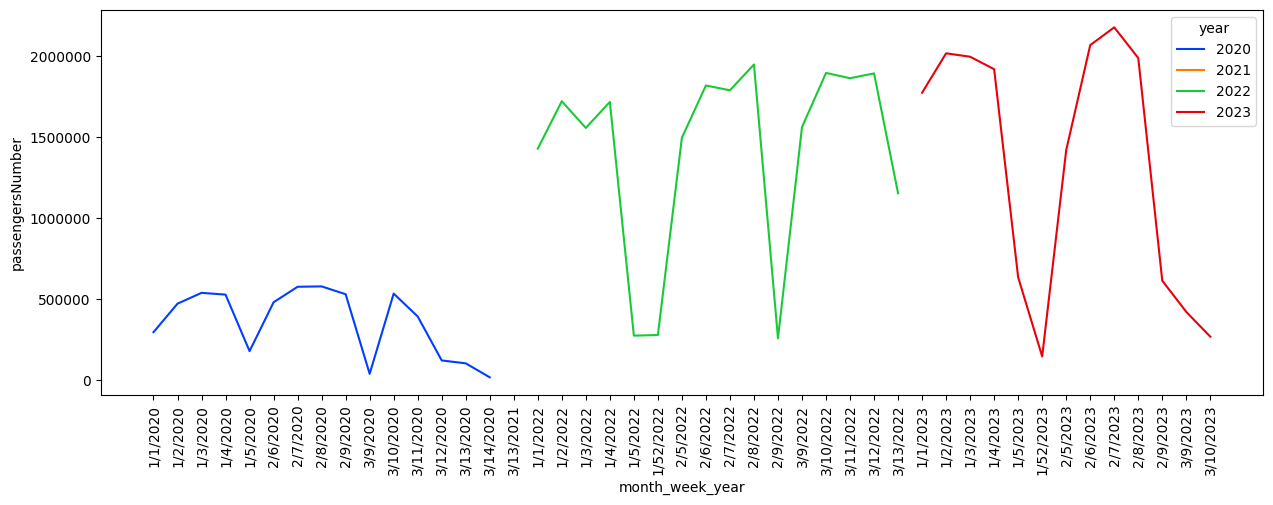

In [ ]:
part1 = tmp3[tmp3.month <= 3]
plt.figure(figsize=(15,5))
fig = sns.lineplot(data=part1,x="month_week_year",y="passengersNumber",hue="year",palette="bright")
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)
plt.show()

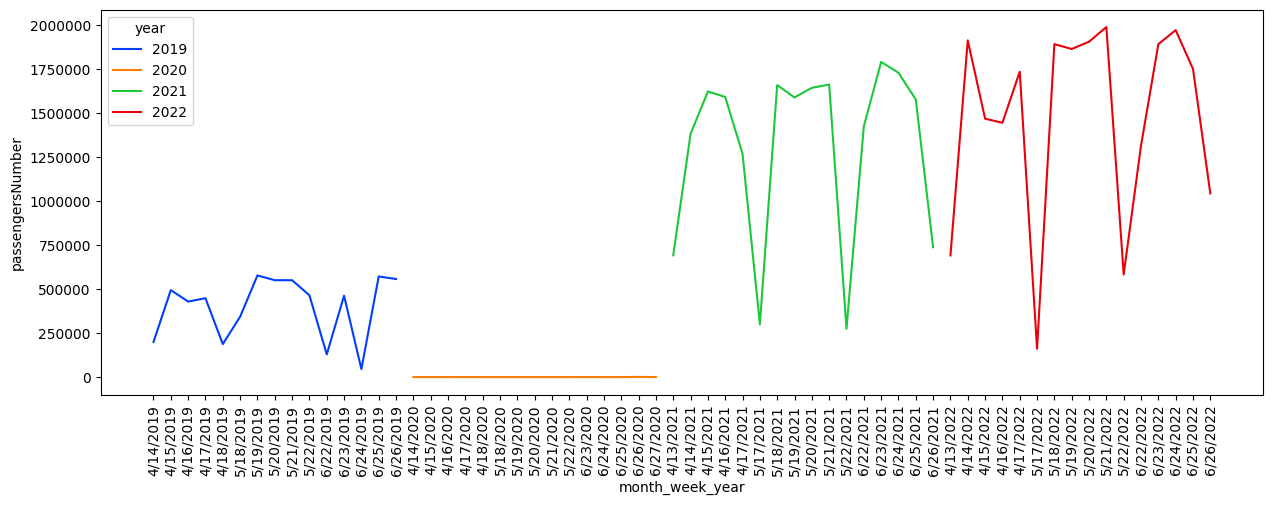

In [ ]:
part2 = tmp3[(tmp3.month > 3) & (tmp3.month <= 6)]
plt.figure(figsize=(15,5))
fig = sns.lineplot(data=part2,x="month_week_year",y="passengersNumber",hue="year",palette="bright")
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)
plt.show()

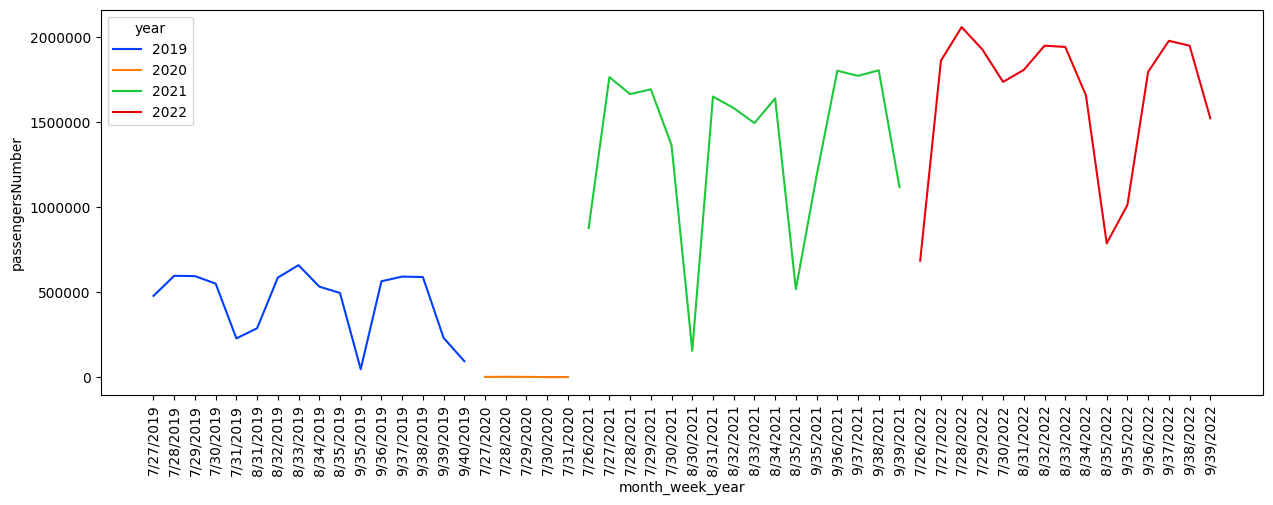

In [ ]:
part4 = tmp3[(tmp3.month > 6) & (tmp3.month <= 9)]
plt.figure(figsize=(15,5))
fig = sns.lineplot(data=part4,x="month_week_year",y="passengersNumber",hue="year",palette="bright")
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)
plt.show()

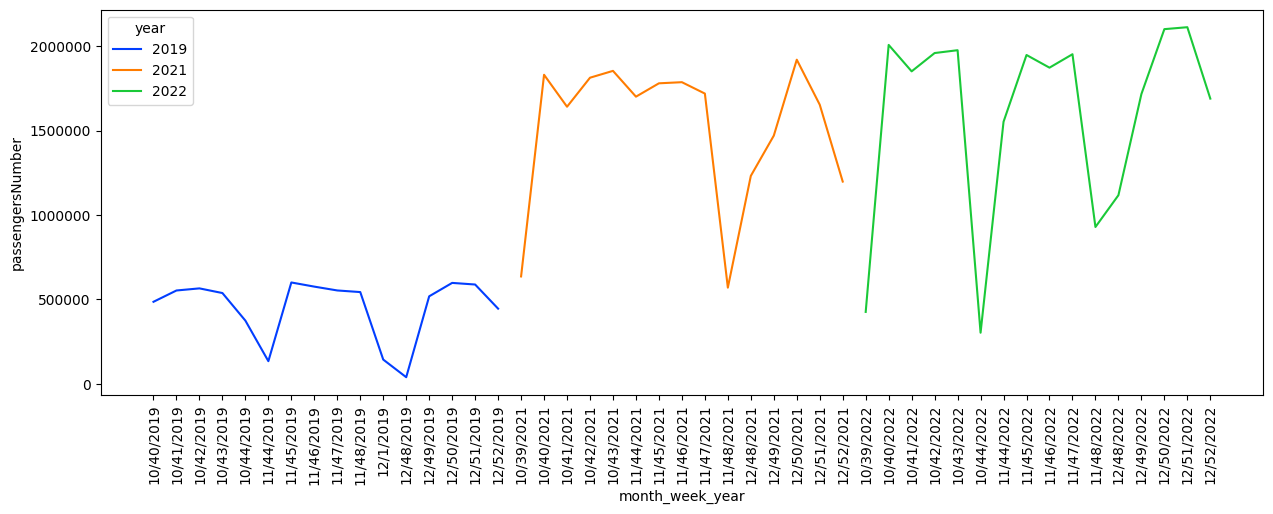

In [ ]:
part4 = tmp3[(tmp3.month > 9) & (tmp3.month <= 12)]
plt.figure(figsize=(15,5))
fig = sns.lineplot(data=part4,x="month_week_year",y="passengersNumber",hue="year",palette="bright")
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)
plt.show()

### Etude des lignes de bus

Avant de continuer on va séparer les données en deux. Ceux de période pré-covid et ceux de la période post-covid. Pour effectuer les visualisations nous allons aggréger les données par semaine et séparer la visualisation des bus de nuit et de jour

In [ ]:
data_bus_week = data_bus.groupby(["year","month","week_number","month_week_year","line","lineType","month_year"]).passengersNumber.agg("sum").reset_index()
data_bus8_pre_covid = data_bus_week[data_bus_week.year < 2020]
data_bus8_post_covid = data_bus_week[data_bus_week.year > 2020]

#### Affluence par ligne de bus précovid

On observe les lignes de jour et les lignes de nuit distinctement.

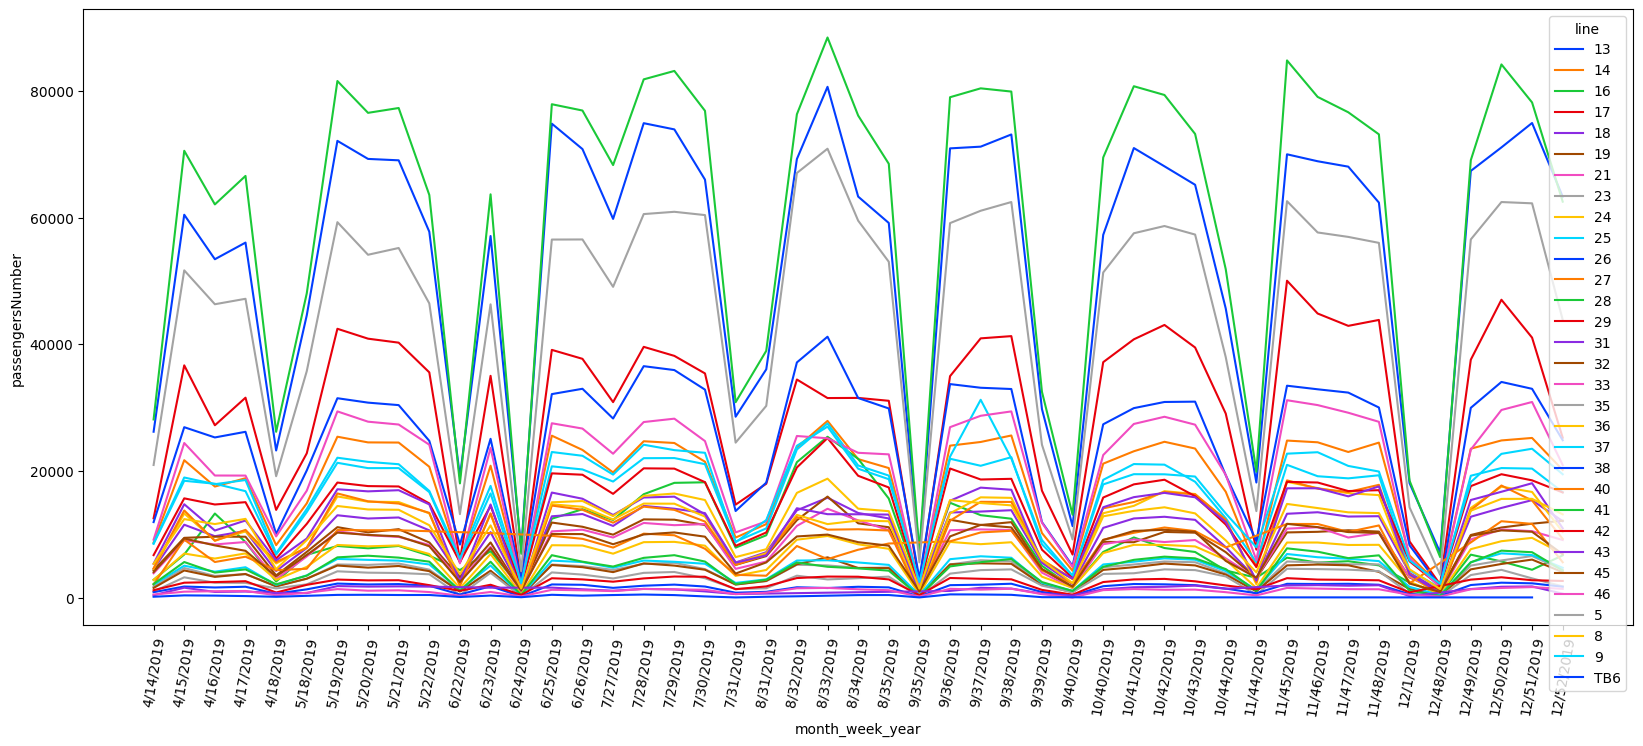

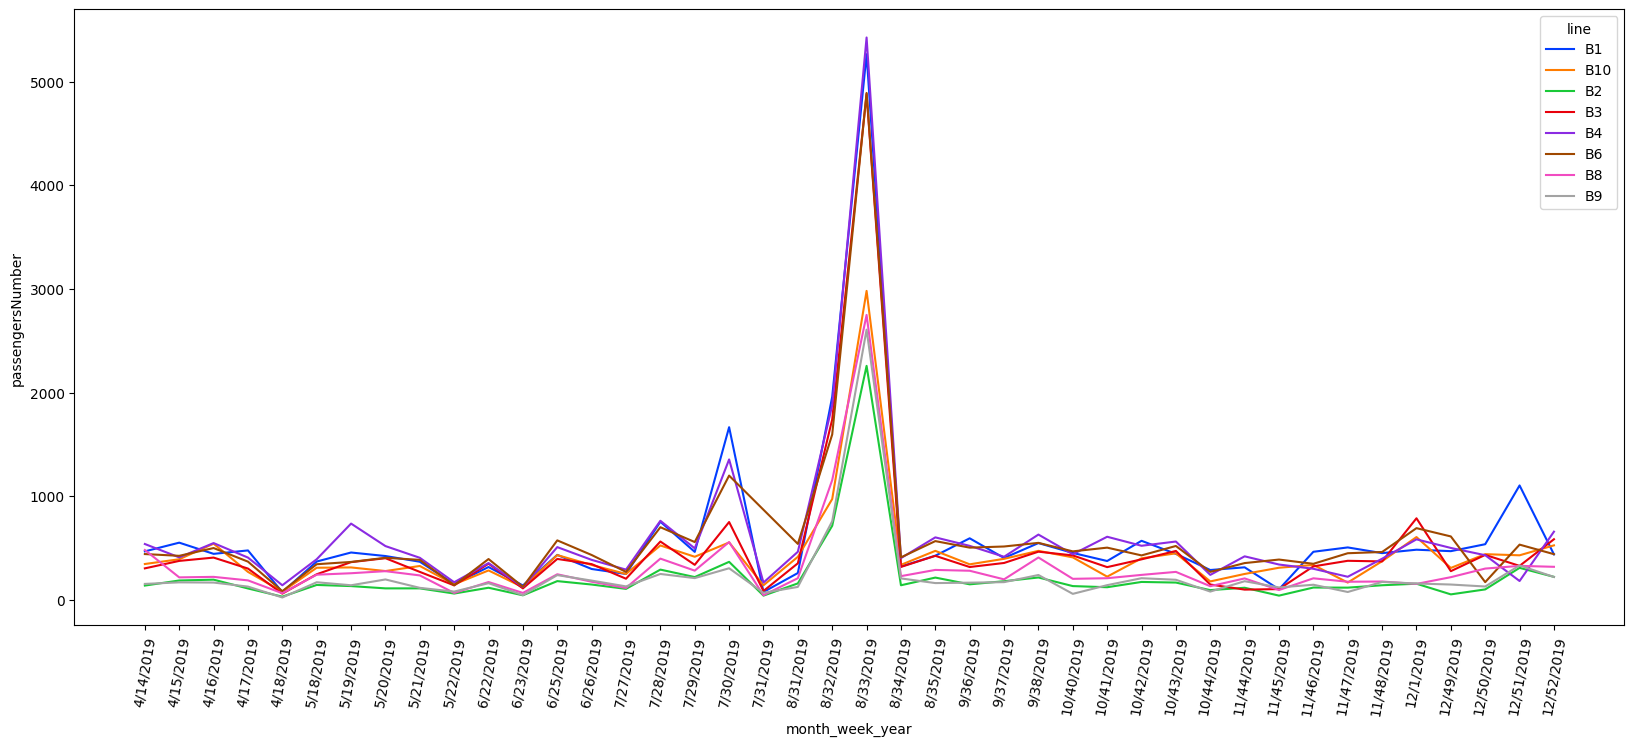

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(data_bus8_pre_covid[data_bus8_pre_covid.lineType == "daily"],x="month_week_year",y="passengersNumber",hue="line",palette="bright")
plt.xticks(rotation=80)
plt.show()

plt.figure(figsize=(20,8))
sns.lineplot(data_bus8_pre_covid[(data_bus8_pre_covid.lineType == "night")],x="month_week_year",y="passengersNumber",hue="line",palette="bright")
plt.xticks(rotation=80)
plt.show()

On constate différent niveau de valeurs de l'affluence pour les différentes ligne, une tendance haute et faible entre chaque début et fin de mois, et différents bruits dans chaque mois. Ainsi on peut déduire que l'affluence est spécifique à chaque ligne de bus et que la tendance normale est une hausse et une baisse de l'affluence entre chaque mois dans lesquelle survient des bruits tantôt similaire, tantôt différent. On remarque surtout qu'il y'a un pique dans le mois d'aout pour les bus de jour comme de nuit.

#### Affluence par ligne de bus postcovid

On observe les lignes de jour et les lignes de nuit distinctement.

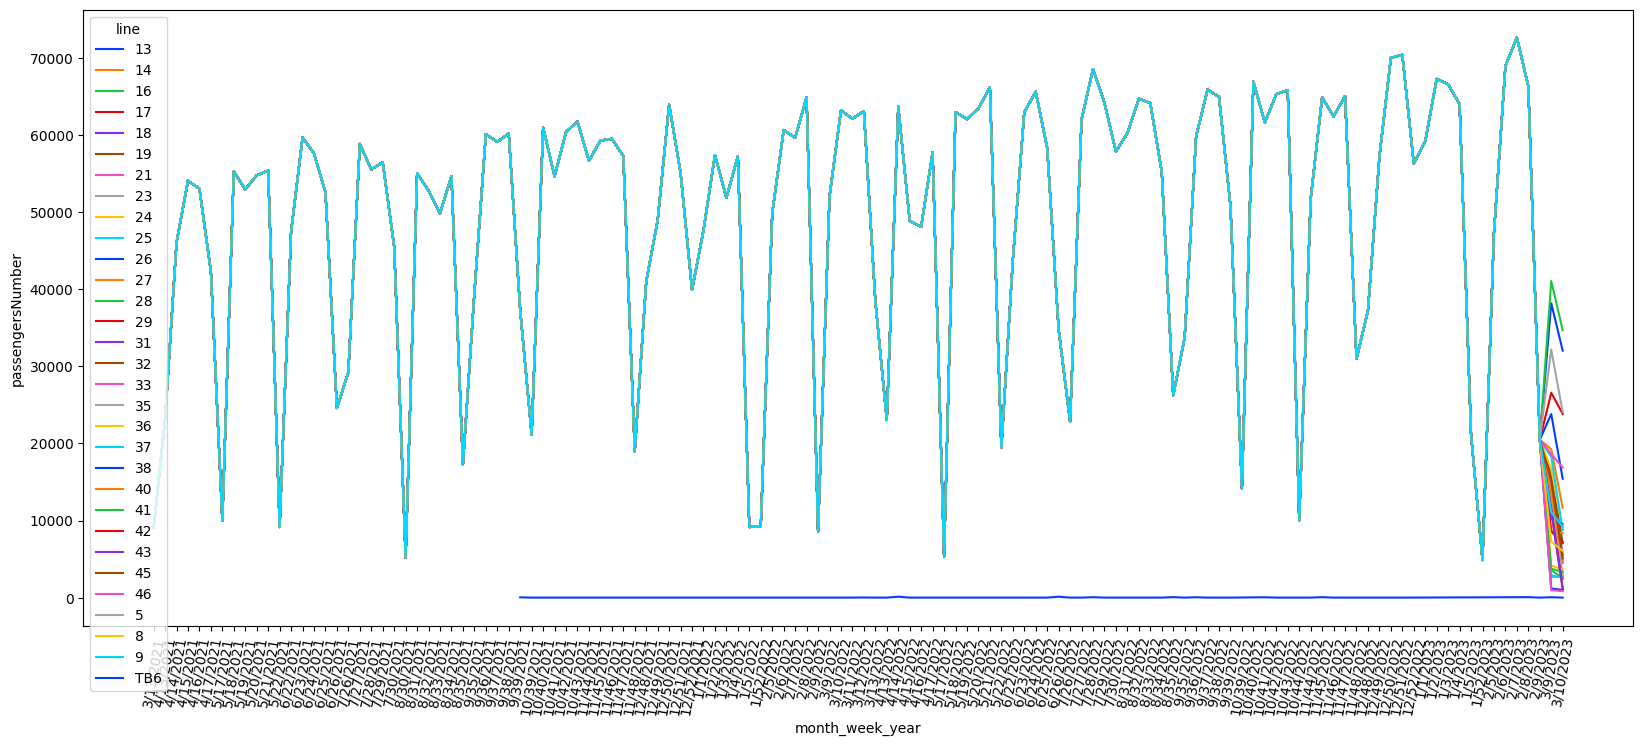

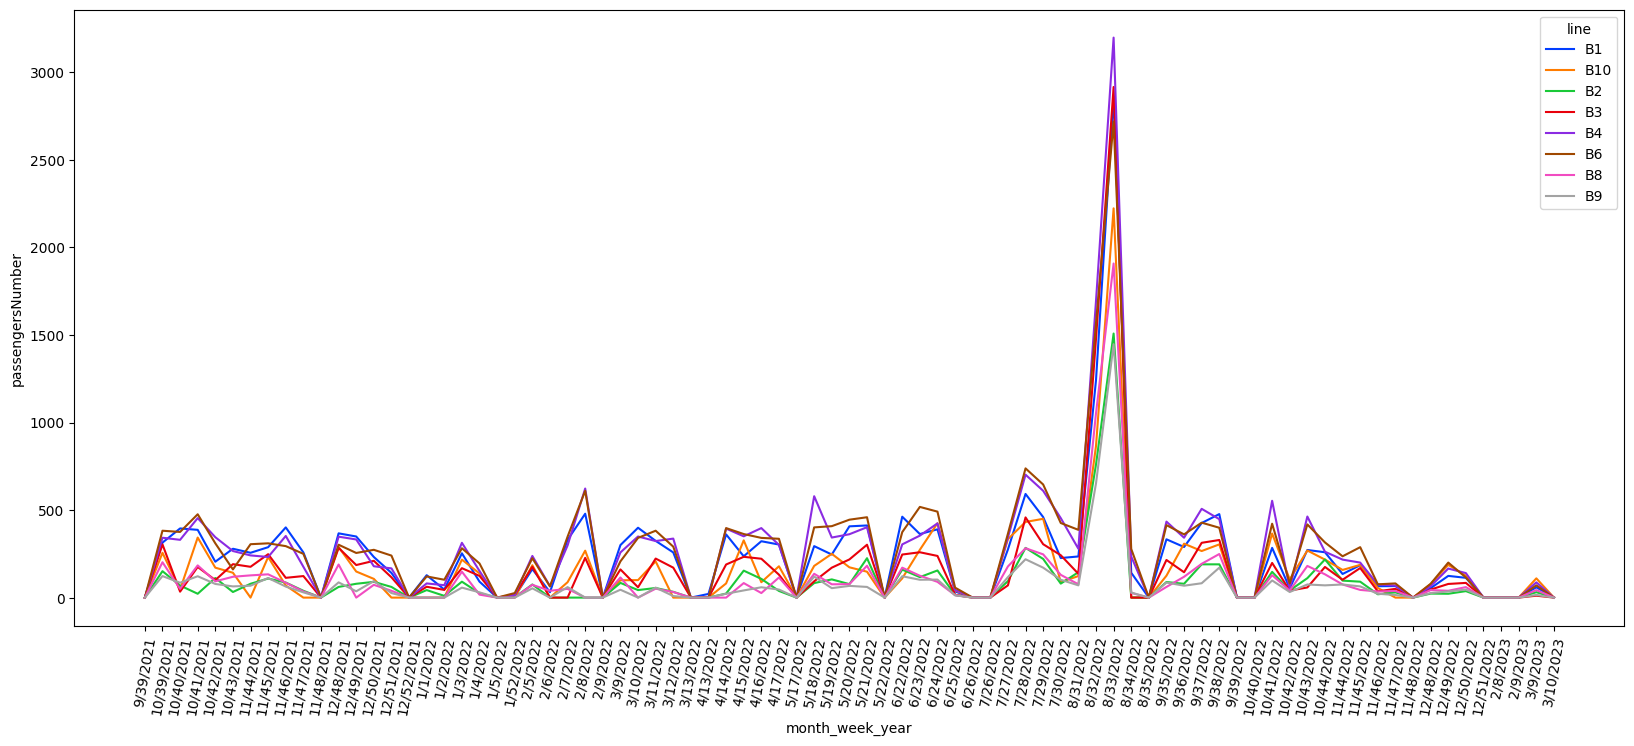

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(data_bus8_post_covid[data_bus8_post_covid.lineType == "daily"],x="month_week_year",y="passengersNumber",hue="line",palette="bright")
plt.xticks(rotation=80)
plt.show()

plt.figure(figsize=(20,8))
sns.lineplot(data_bus8_post_covid[(data_bus8_post_covid.lineType == "night")],x="month_week_year",y="passengersNumber",hue="line",palette="bright")
plt.xticks(rotation=80)
plt.show()

On observe que les lignes de jour possèdent tous la même évolution entre 2021 et mars 2023. Tandis que les ligne de nuit on une évolution irrégulière avec un grand pique en aout 2022

**Conclusion**

En conclusion nous pouvons dire que l'affluence est spécifique à chaque ligne de bus. De plus les lignes suivent globalement la même progression et parfois ont les bruits (pique haut ou bas) à des périodes précises de l'année. Par ailleurs, les données de la période 2021 à mars 2023 pour les bus de jour semblent incorrectes.

In [ ]:
data_bus3 = data_bus2.copy()[["dateTime","day","month","year","passengersNumber","line","lineType"]]

NameError: name 'data_bus2' is not defined

In [ ]:
data_bus3.to_csv("data_processed/1_data_train.csv",index=False)

## Etude de la série temporelle

Nos données se présentent comme une série temporelle par conséquent nous allons vérifié s'il s'agit d'une série stationnaire ou non en utilisant le test de Dickey-Fuller augmenté (ADF).

In [ ]:
from statsmodels.tsa.stattools import adfuller
## Etude de la série temporelle
def ad_test(dataset):
    dftest = adfuller(dataset,autolag='AIC')
    print("1. ADF : ",dftest[0])
    print("2. P-Value : ",dftest[1])
    print("3. Num Of Lags : ",dftest[2])

ad_test(data_bus["passengersNumber"])

D'après les résultats ci-dessus :

ADF = -8.173639889611483, la valeur étant petite et négative on peut dire que le série est stationnaire

P-Value = 8.490911788227853e-13, p-value indique la probabilité d'observer une statistique de test aussi extrême que celle observée si la série est non stationnaire. Dans notre est valeur est très petite par conséquent on peut affirmer que la série est stationnaire

Num Of Lags : 53, le nombre de décalages est élévé or plus il est élevé plus la série temporelle une certaine autocorrélation, ainsi dans notre cas notre présente une autocorrélation.

On somme l'affluence est une série temporelle qui présente un autocorrélation

## Etude de l'influence des données supplémentaires sur l'affluence

On sélectionne les données de la période non COVID.

In [ ]:
data_bus9 = data_bus[data_bus.year != 2020]

On conserve les données des bus de 2019, de janvier à mars 2021 et de février 2023 à plus

In [ ]:
data_bus10 = data_bus9[(data_bus9.year == 2019) | ((data_bus9.year == 2021) & (data_bus9.month <= 3) ) | ((data_bus9.year == 2023) & (data_bus9.month >= 2))]
data_bus10.head()

In [ ]:
data_bus11 = data_bus[(data_bus.year == 2019) & (data_bus.month.isin([4,6,8,10,12]))]

### Etude de la météo

Le relplot ci-dessous montre l'influence de la météo sur l'affluence en 2019

In [ ]:
plt.figure(figsize=(15,8))
sns.relplot(data_bus11,x="dateTime",y="passengersNumber",hue="meteo_status",style="is_weekend",aspect=2)
plt.xticks(rotation=45)
plt.show()

On remarque qu'il est difficile de dire que la méto influence sur l'affluence de façon regressive, néanmoins on peut dire qu'il existe lien entre eux. On remarque aussi que l'opinion sur la météo, même lorsque la météo est défavorable, influence positivement l'affluence par rapport à une météo favorable. Ainsi, on déduit que la météo ne suffit pas pour expliquer les piques et baisses de l'affluence.

## Corrélation

,dateTime,day,month,year,passengersNumber,line,lineType,is_weekend,meteo_status
0,2019-04-05,5,4,2019,418.0,42,daily,False,météo défavorable
1,2019-04-05,5,4,2019,1000.0,16,daily,False,météo défavorable
2,2019-04-05,5,4,2019,113.0,B6,night,False,météo défavorable
3,2019-04-05,5,4,2019,3032.0,29,daily,False,météo défavorable
4,2019-04-05,5,4,2019,4016.0,25,daily,False,météo défavorable


C:\Users\USER\AppData\Local\Temp\ipykernel_22020\1477306010.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_bus2.corr(),annot=True)


<Axes: >

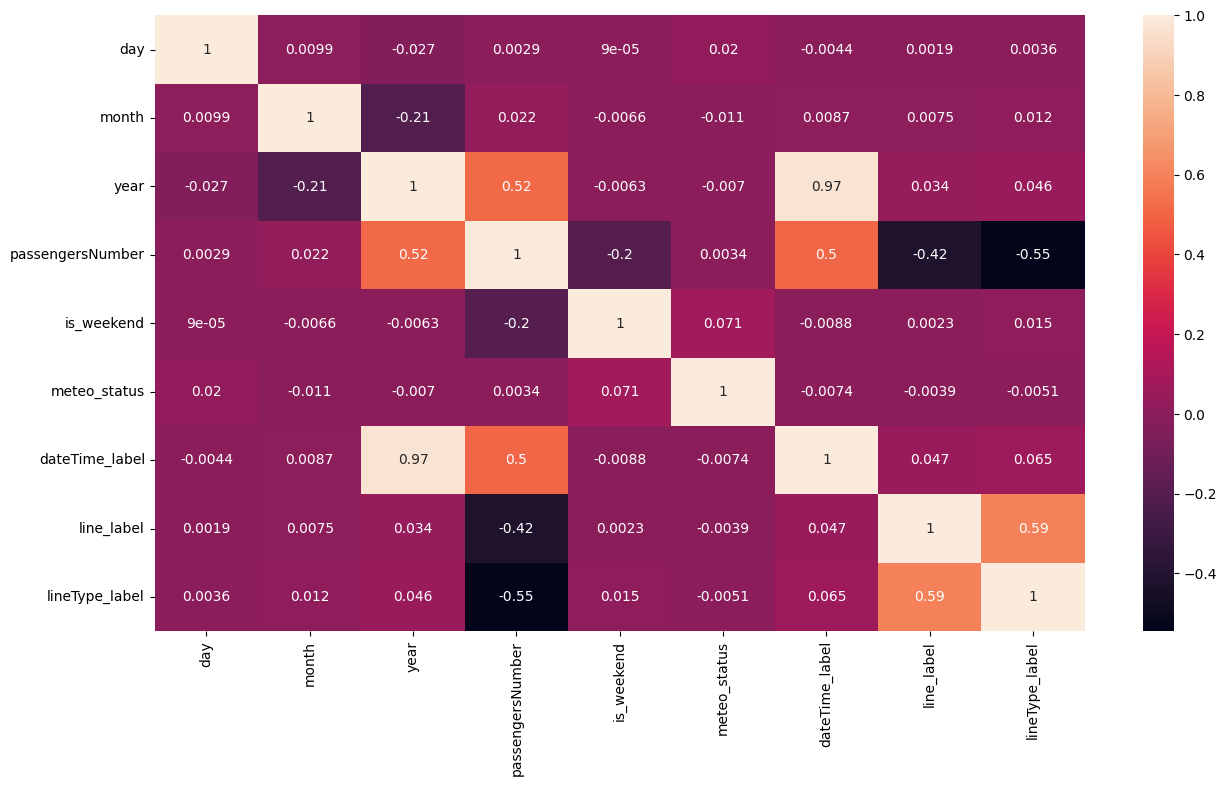

In [21]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
data_bus2 = data_bus.copy()[["dateTime","day","month","year","passengersNumber","line","lineType","is_weekend","meteo_status"]]
display(data_bus2.head())
data_bus2["dateTime_label"] = labelEncoder.fit_transform(data_bus2["dateTime"])
data_bus2["line_label"] = labelEncoder.fit_transform(data_bus2["line"])
data_bus2["lineType_label"] = labelEncoder.fit_transform(data_bus2["lineType"])
data_bus2["meteo_status"] = labelEncoder.fit_transform(data_bus2["meteo_status"])
plt.figure(figsize=(15,8))
sns.heatmap(data_bus2.corr(),annot=True)